# PyTorch i obrazy

## Dataset

In [1]:
import os
import torch
from torch.utils.data import Dataset, random_split
from torchvision import transforms as T
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
pd.read_csv("data/fruits.csv")

,Image,Label
0,banana_1.png,0
1,apple_1.png,1
2,banana_2.png,0
3,apple_2.png,1
4,banana_3.png,0
5,apple_3.png,1
6,banana_4.png,0
7,apple_4.png,1


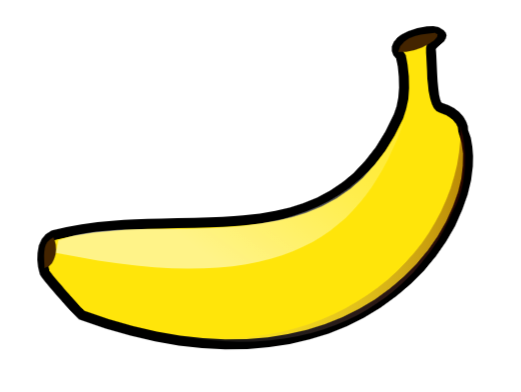

In [3]:
Image.open("data/fruits/banana_1.png")

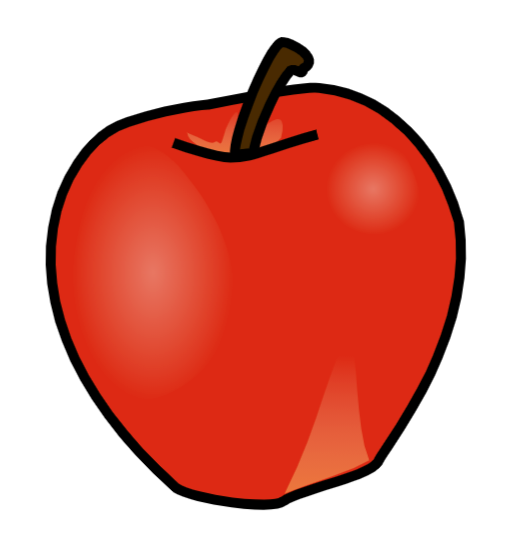

In [4]:
img = Image.open("data/fruits/apple_1.png")
img

In [5]:
type(img)

PIL.PngImagePlugin.PngImageFile

In [6]:
type(np.array(img))

numpy.ndarray

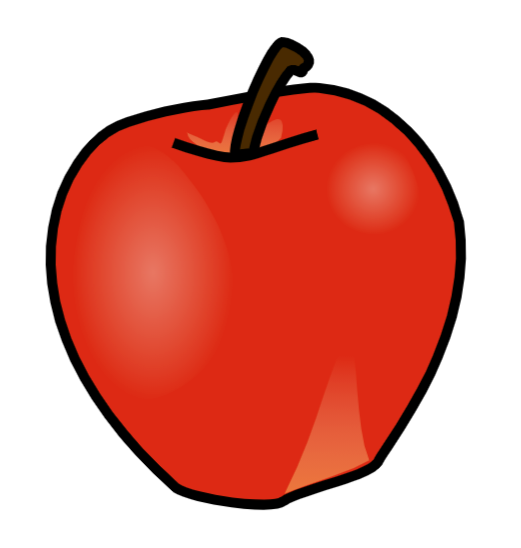

In [7]:
Image.fromarray(np.array(img))

In [8]:
np.array(img).shape

(548, 521, 4)

In [9]:
img.size

(521, 548)

In [10]:
img.mode

'RGBA'

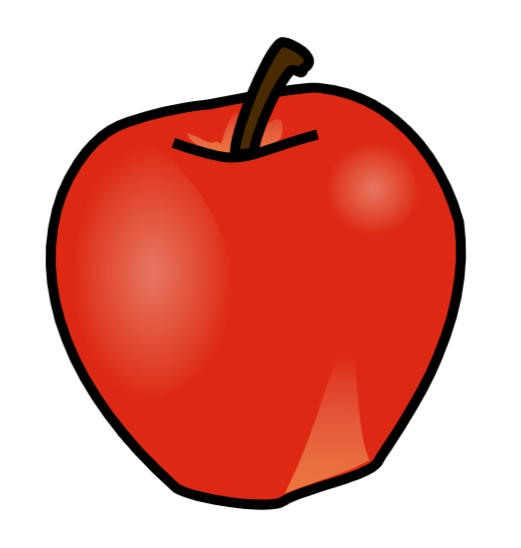

In [11]:
img.convert("RGB")

In [12]:
np.array(img.convert("RGB")).shape

(548, 521, 3)

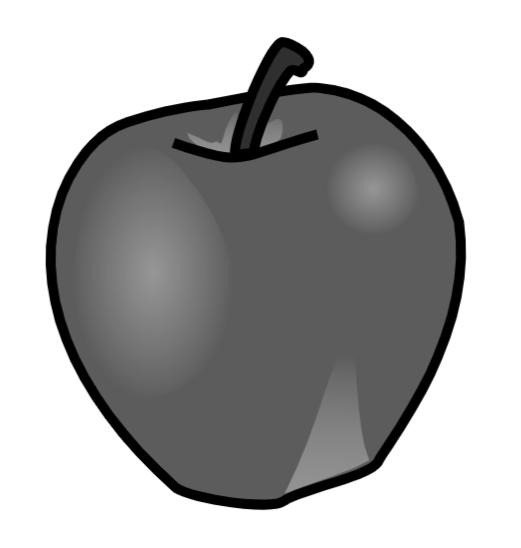

In [13]:
img.convert("L")

In [14]:
np.array(img.convert("L")).shape

(548, 521)

In [15]:
class FruitsDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = Image.open(img_path).convert("RGB")
        y_label = torch.tensor(int(self.annotations.iloc[index, 1]))

        if self.transform:
            image = self.transform(image)

        return image, y_label

In [16]:
dataset = FruitsDataset(csv_file="data/fruits.csv", root_dir="data/fruits")

In [17]:
for img, label in dataset:
    print(f"type: {type(img)}; shape: {np.array(img).shape}; label: {label}")

type: <class 'PIL.Image.Image'>; shape: (392, 521, 3); label: 0
type: <class 'PIL.Image.Image'>; shape: (548, 521, 3); label: 1
type: <class 'PIL.Image.Image'>; shape: (441, 510, 3); label: 0
type: <class 'PIL.Image.Image'>; shape: (458, 477, 3); label: 1
type: <class 'PIL.Image.Image'>; shape: (374, 510, 3); label: 0
type: <class 'PIL.Image.Image'>; shape: (436, 465, 3); label: 1
type: <class 'PIL.Image.Image'>; shape: (414, 510, 3); label: 0
type: <class 'PIL.Image.Image'>; shape: (467, 465, 3); label: 1


In [18]:
img, _ = dataset[0]

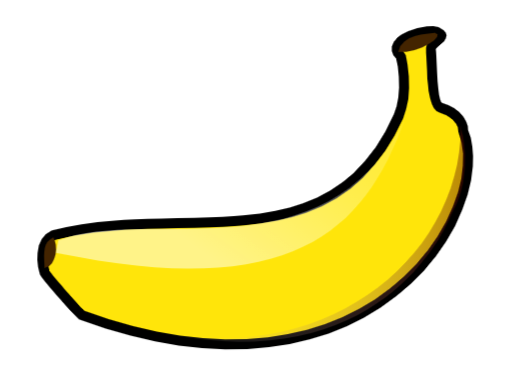

In [19]:
img

In [20]:
fruit_transforms = T.ToTensor()

In [21]:
dataset = FruitsDataset(csv_file="data/fruits.csv", root_dir="data/fruits", transform=fruit_transforms)

In [22]:
for img, label in dataset:
    print(f"type: {type(img)}; shape: {img.shape}; label: {label}")

type: <class 'torch.Tensor'>; shape: torch.Size([3, 392, 521]); label: 0
type: <class 'torch.Tensor'>; shape: torch.Size([3, 548, 521]); label: 1
type: <class 'torch.Tensor'>; shape: torch.Size([3, 441, 510]); label: 0
type: <class 'torch.Tensor'>; shape: torch.Size([3, 458, 477]); label: 1
type: <class 'torch.Tensor'>; shape: torch.Size([3, 374, 510]); label: 0
type: <class 'torch.Tensor'>; shape: torch.Size([3, 436, 465]); label: 1
type: <class 'torch.Tensor'>; shape: torch.Size([3, 414, 510]); label: 0
type: <class 'torch.Tensor'>; shape: torch.Size([3, 467, 465]); label: 1


In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

In [24]:
def imshow(img):
    plt.imshow(img)
    plt.show()

In [25]:
img, _ = dataset[0]

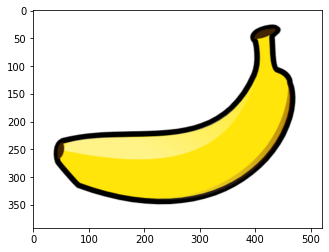

In [26]:
imshow(img.permute(1, 2, 0))

In [27]:
fruit_transforms = T.Compose([
    T.Resize((256, 256)),
    T.ToTensor()
])

In [28]:
dataset = FruitsDataset(csv_file="data/fruits.csv", root_dir="data/fruits", transform=fruit_transforms)

In [29]:
for img, label in dataset:
    print(f"type: {type(img)}; shape: {img.shape}; label: {label}")

type: <class 'torch.Tensor'>; shape: torch.Size([3, 256, 256]); label: 0
type: <class 'torch.Tensor'>; shape: torch.Size([3, 256, 256]); label: 1
type: <class 'torch.Tensor'>; shape: torch.Size([3, 256, 256]); label: 0
type: <class 'torch.Tensor'>; shape: torch.Size([3, 256, 256]); label: 1
type: <class 'torch.Tensor'>; shape: torch.Size([3, 256, 256]); label: 0
type: <class 'torch.Tensor'>; shape: torch.Size([3, 256, 256]); label: 1
type: <class 'torch.Tensor'>; shape: torch.Size([3, 256, 256]); label: 0
type: <class 'torch.Tensor'>; shape: torch.Size([3, 256, 256]); label: 1


In [30]:
img, _ = dataset[0]

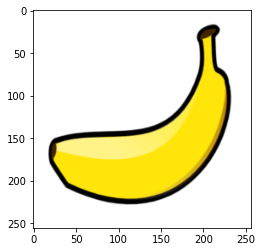

In [31]:
imshow(img.permute(1, 2, 0))

In [32]:
fruit_transforms = T.Compose([
    T.Resize((256, 256)),
    T.RandomCrop((224, 224)),
    T.RandomRotation(degrees=30),
    T.RandomHorizontalFlip(p=0.5),
    T.RandomVerticalFlip(p=0.1),
    T.ToTensor()
])

In [33]:
dataset = FruitsDataset(csv_file="data/fruits.csv", root_dir="data/fruits", transform=fruit_transforms)

In [34]:
for img, label in dataset:
    print(f"type: {type(img)}; shape: {img.shape}; label: {label}")

type: <class 'torch.Tensor'>; shape: torch.Size([3, 224, 224]); label: 0
type: <class 'torch.Tensor'>; shape: torch.Size([3, 224, 224]); label: 1
type: <class 'torch.Tensor'>; shape: torch.Size([3, 224, 224]); label: 0
type: <class 'torch.Tensor'>; shape: torch.Size([3, 224, 224]); label: 1
type: <class 'torch.Tensor'>; shape: torch.Size([3, 224, 224]); label: 0
type: <class 'torch.Tensor'>; shape: torch.Size([3, 224, 224]); label: 1
type: <class 'torch.Tensor'>; shape: torch.Size([3, 224, 224]); label: 0
type: <class 'torch.Tensor'>; shape: torch.Size([3, 224, 224]); label: 1


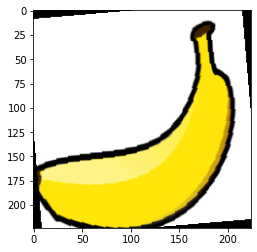

In [35]:
img, _ = dataset[0]
imshow(img.permute(1, 2, 0))

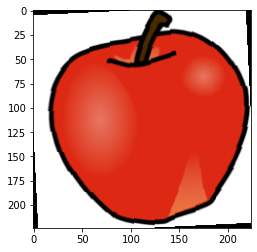

In [36]:
img, _ = dataset[1]
imshow(img.permute(1, 2, 0))

In [37]:
fruit_transforms = T.Compose([
    T.Resize((256, 256)),
    T.ToTensor()
])

In [38]:
dataset = FruitsDataset(csv_file="data/fruits.csv", root_dir="data/fruits", transform=fruit_transforms)

In [39]:
imgs = []
for img, _ in dataset:
    imgs.append(img)

In [40]:
imgs

[tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]),
 tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
       

In [41]:
imgs[0].shape

torch.Size([3, 256, 256])

In [42]:
stacked_imgs = torch.stack(imgs, 3)
stacked_imgs

tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         ...,

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 

In [43]:
stacked_imgs.shape

torch.Size([3, 256, 256, 8])

In [44]:
stacked_imgs[0].mean()

tensor(0.8991)

In [45]:
stacked_imgs.reshape(3, -1).mean(dim=1)

tensor([0.8991, 0.7597, 0.6830])

In [46]:
stacked_imgs.reshape(3, -1).std(dim=1)

tensor([0.2119, 0.3765, 0.4125])

In [47]:
means = [0.8991, 0.7597, 0.6830]
stds = [0.2119, 0.3765, 0.4125]

In [48]:
fruit_transforms = T.Compose([
    T.Resize((256, 256)),
    T.RandomCrop((224, 224)),
    T.RandomRotation(degrees=30),
    T.RandomHorizontalFlip(p=0.5),
    T.RandomVerticalFlip(p=0.1),
    T.ToTensor(),
    T.Normalize(mean=means, std=stds)
])

In [49]:
dataset = FruitsDataset(csv_file="data/fruits.csv", root_dir="data/fruits", transform=fruit_transforms)

In [50]:
train_set, test_set = random_split(dataset, [6, 2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 224, 224])


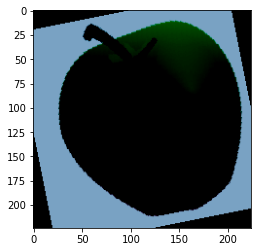

In [51]:
img, _ = train_set[0]
print(img.shape)
imshow(img.permute(1, 2, 0))